# 作業2：Json資料處理
  1.哪種學群畢業人數最多?2.哪種學群就業率最高?3.哪種學群就業人數最多?
## 110學年高級中等學校應屆畢業生就業概況(按群別分)
## 最終分析結果:
# 1.學術群畢業人數最多
# 2.綜合群就業率最高
# 3.餐旅群就業人數最多

資料來源：政府資料開放平台[（International Air Transport Association](https://data.gov.tw/)

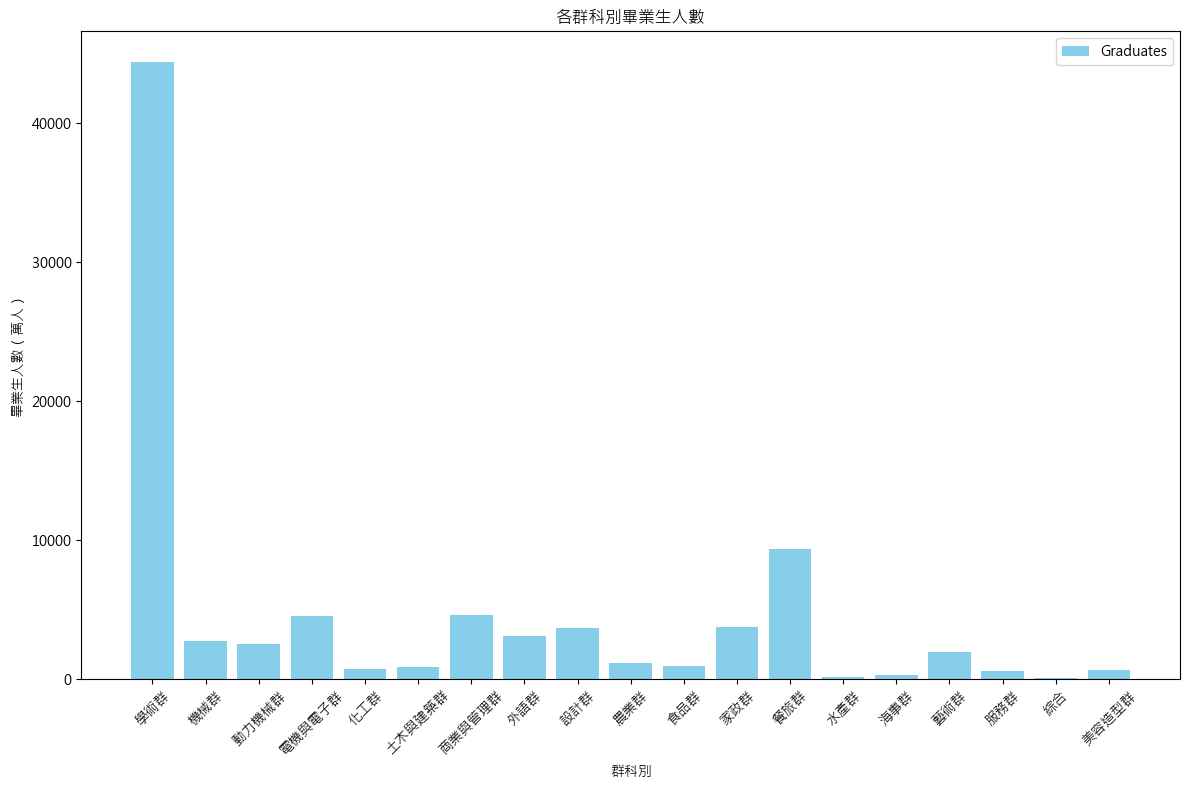

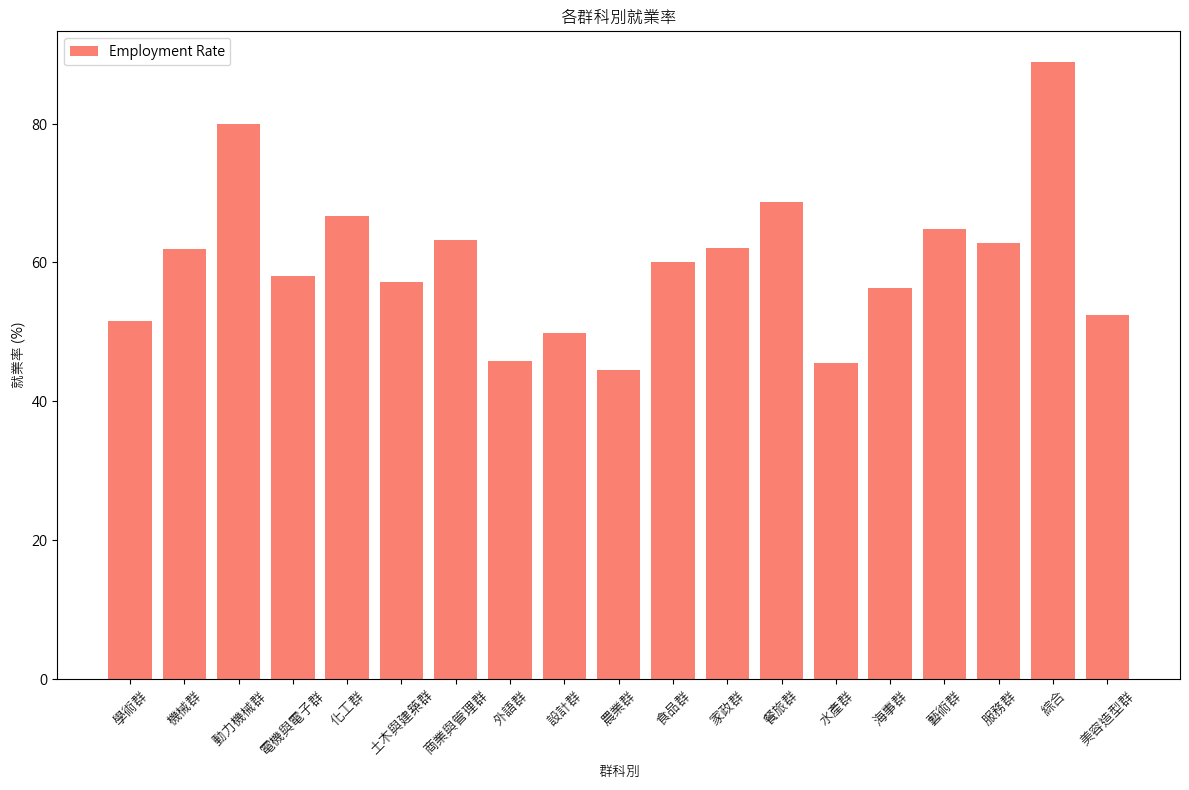

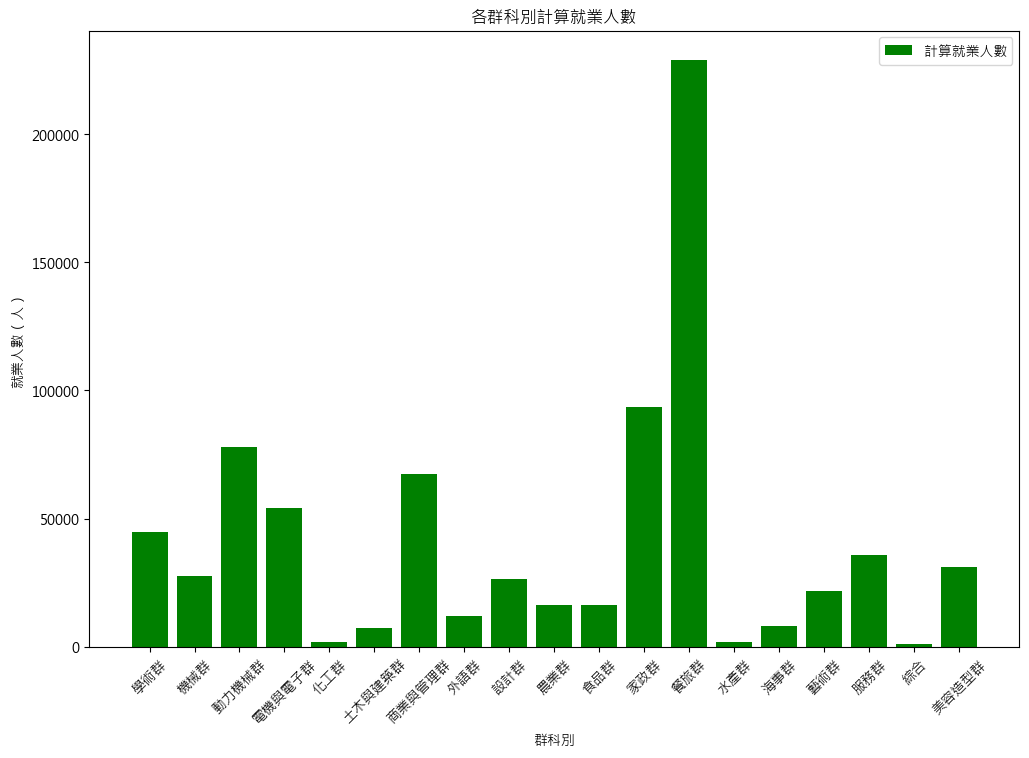

In [1]:
import json, ssl, urllib.request
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 修改為你的字型名稱

url = 'https://stats.moe.gov.tw/files/investigate/high_graduate/110/110_1_2_10.json'
context = ssl._create_unverified_context()

with urllib.request.urlopen(url, context=context) as jsondata:
    # 將 JSON 進行 UTF-8 的 BOM 解碼，並把解碼後的資料載入 JSON 陣列中
    data = json.loads(jsondata.read().decode('utf-8-sig'))

# 將 JSON 資料轉換成 DataFrame
df = pd.DataFrame(data)

# 設置圖表大小
plt.figure(figsize=(12, 8))

# 繪製柱狀圖，比較每個群科別的畢業生人數
plt.bar(df['群科別'], df['畢業生人數'], color='skyblue', label='Graduates')

# 添加標籤和標題
plt.xlabel('群科別')
plt.ylabel('畢業生人數')
plt.ylabel('畢業生人數（萬人）')  # 在 y 軸添加單位
plt.title('各群科別畢業生人數')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，讓它們不重疊
plt.legend()  # 添加圖例
plt.tight_layout()  # 自動調整圖表布局，避免標籤被切斷
plt.show()

# 設置圖表大小
plt.figure(figsize=(12, 8))

# 繪製柱狀圖，比較每個群科別的就業率
plt.bar(df['群科別'], df['就業率'], color='salmon', label='Employment Rate')

# 添加標籤和標題
plt.xlabel('群科別')
plt.ylabel('就業率 (%)')
plt.title('各群科別就業率')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，讓它們不重疊
plt.legend()  # 添加圖例
plt.tight_layout()  # 自動調整圖表布局，避免標籤被切斷
plt.show()
# 計算每個群科別的就業人數
df['計算就業人數'] = df['畢業生人數'] * df['就業率']

# 設置圖表大小
plt.figure(figsize=(12, 8))

# 繪製柱狀圖，比較每個群科別的就業人數
plt.bar(df['群科別'], df['計算就業人數'], color='green', label='計算就業人數')

# 添加標籤和標題
plt.xlabel('群科別')
plt.ylabel('就業人數（人）')  # 在 y 軸添加單位
plt.title('各群科別計算就業人數')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，讓它們不重疊
plt.legend()  # 添加圖例

# 顯示圖表
plt.show()